In [1]:
#Let's get rid of some imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#Define the model 
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
#From sklearn tutorial.
from sklearn.datasets import load_boston
boston = load_boston()
print( "Type of boston dataset:", type(boston))

Type of boston dataset: <class 'sklearn.utils.Bunch'>


In [3]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
import pandas as pd
boston_df = pd.DataFrame(boston['data'] )
boston_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
boston_df.columns = boston['feature_names']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
boston_df['PRICE']= boston['target']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
import numpy as np
#check for missing values
print(np.sum(np.isnan(boston_df)))

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64


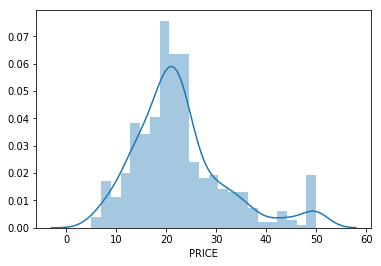

In [11]:
import seaborn as sns
sns.distplot(boston_df['PRICE']);

In [12]:
#This will throw and error at import if haven't upgraded. 
# from sklearn.cross_validation  import train_test_split  
from sklearn.model_selection  import train_test_split
#y is the dependent variable.
y = boston_df['PRICE']
#As we know, iloc is used to slice the array by index number. Here this is the matrix of 
#independent variables.
X = boston_df.iloc[:,0:13]

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(354, 13) (152, 13) (354,) (152,)


In [22]:
#Define training hyperprameters.
batch_size = 50
num_epochs = 2000
learning_rate = 0.01
size_hidden= 100

#Calculate some other hyperparameters based on data.  
batch_no = len(X_train) // batch_size  #batches
cols=X_train.shape[1] #Number of columns in input matrix
n_output=1

In [ ]:
cols

In [23]:
#Create the model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Assume that we are on a CUDA machine, then this should print a CUDA device:
print("Executing the model on :",device)
class Net(torch.nn.Module):
    def __init__(self, n_feature, size_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(cols, size_hidden)   # hidden layer
        self.predict = torch.nn.Linear(size_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x
net = Net(cols, size_hidden, n_output)

Executing the model on : cpu


In [24]:
#Adam is a specific flavor of gradient decent which is typically better
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
criterion = torch.nn.MSELoss(size_average=False)  # this is for regression mean squared loss

/usr/lib64/python3.6/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [25]:
#Change to numpy arraay. 
X_train=X_train.values
y_train=y_train.values
X_test=X_test.values
y_test=y_test.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [26]:
from sklearn.utils import shuffle
from torch.autograd import Variable
running_loss = 0.0
for epoch in range(num_epochs):
    #Shuffle just mixes up the dataset between epocs
    X_train, y_train = shuffle(X_train, y_train)
    # Mini batch learning
    for i in range(batch_no):
        start = i * batch_size
        end = start + batch_size
        inputs = Variable(torch.FloatTensor(X_train[start:end]))
        labels = Variable(torch.FloatTensor(y_train[start:end]))
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        #print("outputs",outputs)
        #print("outputs",outputs,outputs.shape,"labels",labels, labels.shape)
        loss = criterion(outputs, torch.unsqueeze(labels,dim=1))
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
    print('Epoch {}'.format(epoch+1), "loss: ",running_loss)
    running_loss = 0.0


Epoch 1 loss:  393035.25
Epoch 2 loss:  130441.98803710938
Epoch 3 loss:  90520.1796875
Epoch 4 loss:  52373.172119140625
Epoch 5 loss:  31768.714599609375
Epoch 6 loss:  26013.705200195312
Epoch 7 loss:  21820.701171875
Epoch 8 loss:  18870.851196289062
Epoch 9 loss:  19711.075317382812
Epoch 10 loss:  18623.577758789062
Epoch 11 loss:  19254.244384765625
Epoch 12 loss:  18193.008422851562
Epoch 13 loss:  17840.668579101562
Epoch 14 loss:  17991.901123046875
Epoch 15 loss:  16988.83233642578
Epoch 16 loss:  17323.371459960938
Epoch 17 loss:  17164.971313476562
Epoch 18 loss:  15765.024291992188
Epoch 19 loss:  16429.071411132812
Epoch 20 loss:  15563.498291015625
Epoch 21 loss:  15414.072265625
Epoch 22 loss:  15515.862915039062
Epoch 23 loss:  15395.629272460938
Epoch 24 loss:  14872.045288085938
Epoch 25 loss:  14454.295654296875
Epoch 26 loss:  13709.052062988281
Epoch 27 loss:  13557.146118164062
Epoch 28 loss:  13065.680297851562
Epoch 29 loss:  13542.588134765625
Epoch 30 loss: 

Epoch 249 loss:  3580.5054931640625
Epoch 250 loss:  3676.082550048828
Epoch 251 loss:  3633.9344482421875
Epoch 252 loss:  3630.168731689453
Epoch 253 loss:  3601.7388916015625
Epoch 254 loss:  3748.802764892578
Epoch 255 loss:  4103.333892822266
Epoch 256 loss:  3982.0078125
Epoch 257 loss:  3764.042938232422
Epoch 258 loss:  3721.1168823242188
Epoch 259 loss:  5390.250915527344
Epoch 260 loss:  5534.918060302734
Epoch 261 loss:  5676.4130859375
Epoch 262 loss:  4481.606964111328
Epoch 263 loss:  5303.090057373047
Epoch 264 loss:  5815.084869384766
Epoch 265 loss:  4622.9761962890625
Epoch 266 loss:  3784.078369140625
Epoch 267 loss:  4254.904479980469
Epoch 268 loss:  4823.587493896484
Epoch 269 loss:  3957.3377075195312
Epoch 270 loss:  3620.0823974609375
Epoch 271 loss:  3421.9539184570312
Epoch 272 loss:  3751.1170043945312
Epoch 273 loss:  3166.7203063964844
Epoch 274 loss:  4050.642059326172
Epoch 275 loss:  3879.765350341797
Epoch 276 loss:  3667.257568359375
Epoch 277 loss:  

Epoch 494 loss:  4140.384704589844
Epoch 495 loss:  3154.7667541503906
Epoch 496 loss:  3096.3843994140625
Epoch 497 loss:  3863.823211669922
Epoch 498 loss:  3413.3163452148438
Epoch 499 loss:  3014.7936401367188
Epoch 500 loss:  2773.910659790039
Epoch 501 loss:  2297.5430908203125
Epoch 502 loss:  2501.236770629883
Epoch 503 loss:  2435.6495208740234
Epoch 504 loss:  2648.8941802978516
Epoch 505 loss:  2586.216827392578
Epoch 506 loss:  2216.044204711914
Epoch 507 loss:  2410.4251861572266
Epoch 508 loss:  2383.8223571777344
Epoch 509 loss:  2610.8877868652344
Epoch 510 loss:  2673.6744537353516
Epoch 511 loss:  2579.9617767333984
Epoch 512 loss:  2493.882354736328
Epoch 513 loss:  2321.5043182373047
Epoch 514 loss:  2808.276168823242
Epoch 515 loss:  2636.6150512695312
Epoch 516 loss:  2855.0278930664062
Epoch 517 loss:  2452.9881439208984
Epoch 518 loss:  2345.4307556152344
Epoch 519 loss:  2390.535446166992
Epoch 520 loss:  2618.0242767333984
Epoch 521 loss:  2612.3746032714844
E

Epoch 743 loss:  2336.835906982422
Epoch 744 loss:  2095.6221923828125
Epoch 745 loss:  2185.6886596679688
Epoch 746 loss:  2698.4815063476562
Epoch 747 loss:  2273.313720703125
Epoch 748 loss:  2418.3931427001953
Epoch 749 loss:  2198.371383666992
Epoch 750 loss:  2714.567825317383
Epoch 751 loss:  1853.978530883789
Epoch 752 loss:  2175.3145751953125
Epoch 753 loss:  2267.0015563964844
Epoch 754 loss:  2192.4874572753906
Epoch 755 loss:  2022.4427795410156
Epoch 756 loss:  2010.2472686767578
Epoch 757 loss:  2679.8477783203125
Epoch 758 loss:  2638.701629638672
Epoch 759 loss:  2101.7369232177734
Epoch 760 loss:  1644.670883178711
Epoch 761 loss:  1919.381591796875
Epoch 762 loss:  1732.4925689697266
Epoch 763 loss:  2168.5039672851562
Epoch 764 loss:  2095.6939392089844
Epoch 765 loss:  1787.3290405273438
Epoch 766 loss:  1927.2103424072266
Epoch 767 loss:  1962.6591796875
Epoch 768 loss:  1997.4156188964844
Epoch 769 loss:  1888.4274139404297
Epoch 770 loss:  1672.795166015625
Epoc

Epoch 1007 loss:  1632.9754180908203
Epoch 1008 loss:  1775.767318725586
Epoch 1009 loss:  2304.8019256591797
Epoch 1010 loss:  1618.3534393310547
Epoch 1011 loss:  1594.8471221923828
Epoch 1012 loss:  1370.3362426757812
Epoch 1013 loss:  1362.0228424072266
Epoch 1014 loss:  1401.5941925048828
Epoch 1015 loss:  1481.238998413086
Epoch 1016 loss:  1359.639762878418
Epoch 1017 loss:  1429.4403381347656
Epoch 1018 loss:  1887.1915588378906
Epoch 1019 loss:  1608.1020202636719
Epoch 1020 loss:  1841.069969177246
Epoch 1021 loss:  1776.2535858154297
Epoch 1022 loss:  1751.2185974121094
Epoch 1023 loss:  1519.8300476074219
Epoch 1024 loss:  1551.1793212890625
Epoch 1025 loss:  1900.5124969482422
Epoch 1026 loss:  1904.3677215576172
Epoch 1027 loss:  2136.5285034179688
Epoch 1028 loss:  2122.300582885742
Epoch 1029 loss:  1892.6327514648438
Epoch 1030 loss:  1791.7129821777344
Epoch 1031 loss:  1723.826904296875
Epoch 1032 loss:  1598.192611694336
Epoch 1033 loss:  1392.0726928710938
Epoch 10

Epoch 1246 loss:  1809.9991455078125
Epoch 1247 loss:  1610.5337371826172
Epoch 1248 loss:  2426.8966522216797
Epoch 1249 loss:  2079.4991149902344
Epoch 1250 loss:  1738.7543487548828
Epoch 1251 loss:  1920.0897216796875
Epoch 1252 loss:  2444.294387817383
Epoch 1253 loss:  2599.686721801758
Epoch 1254 loss:  2420.945846557617
Epoch 1255 loss:  2859.8527069091797
Epoch 1256 loss:  3747.9696044921875
Epoch 1257 loss:  3599.521286010742
Epoch 1258 loss:  2374.0533142089844
Epoch 1259 loss:  2763.719741821289
Epoch 1260 loss:  2106.0713806152344
Epoch 1261 loss:  2086.5555267333984
Epoch 1262 loss:  1852.1755065917969
Epoch 1263 loss:  1599.779281616211
Epoch 1264 loss:  2045.695297241211
Epoch 1265 loss:  1874.2280731201172
Epoch 1266 loss:  1654.9500427246094
Epoch 1267 loss:  1348.3278350830078
Epoch 1268 loss:  1370.5469284057617
Epoch 1269 loss:  1671.680908203125
Epoch 1270 loss:  1712.1432342529297
Epoch 1271 loss:  1729.010238647461
Epoch 1272 loss:  1617.9771575927734
Epoch 1273

Epoch 1483 loss:  1299.4329223632812
Epoch 1484 loss:  1295.7960815429688
Epoch 1485 loss:  1432.7575378417969
Epoch 1486 loss:  1820.2840576171875
Epoch 1487 loss:  2047.3253479003906
Epoch 1488 loss:  1852.4946746826172
Epoch 1489 loss:  1918.5203857421875
Epoch 1490 loss:  2227.4158477783203
Epoch 1491 loss:  1701.953384399414
Epoch 1492 loss:  1823.8129119873047
Epoch 1493 loss:  1753.4632873535156
Epoch 1494 loss:  1642.6032104492188
Epoch 1495 loss:  2321.7247161865234
Epoch 1496 loss:  1972.8812713623047
Epoch 1497 loss:  2717.2659912109375
Epoch 1498 loss:  2247.1342010498047
Epoch 1499 loss:  2094.953109741211
Epoch 1500 loss:  2109.6939392089844
Epoch 1501 loss:  1930.1463928222656
Epoch 1502 loss:  1810.4429779052734
Epoch 1503 loss:  2032.1206665039062
Epoch 1504 loss:  1813.6637573242188
Epoch 1505 loss:  1803.8937072753906
Epoch 1506 loss:  2702.5852661132812
Epoch 1507 loss:  2173.743621826172
Epoch 1508 loss:  2173.139129638672
Epoch 1509 loss:  2487.6900482177734
Epoch

Epoch 1719 loss:  2350.743637084961
Epoch 1720 loss:  2478.7748413085938
Epoch 1721 loss:  2145.5640258789062
Epoch 1722 loss:  1788.6942291259766
Epoch 1723 loss:  1862.860824584961
Epoch 1724 loss:  1370.0824279785156
Epoch 1725 loss:  1479.5657348632812
Epoch 1726 loss:  1660.8267135620117
Epoch 1727 loss:  1596.2366027832031
Epoch 1728 loss:  1361.5739364624023
Epoch 1729 loss:  1579.8844451904297
Epoch 1730 loss:  2369.8997802734375
Epoch 1731 loss:  2492.0628204345703
Epoch 1732 loss:  2641.214859008789
Epoch 1733 loss:  2607.8447875976562
Epoch 1734 loss:  2110.1768341064453
Epoch 1735 loss:  1610.5383758544922
Epoch 1736 loss:  1463.3258819580078
Epoch 1737 loss:  1545.7855987548828
Epoch 1738 loss:  1785.436882019043
Epoch 1739 loss:  1419.2999420166016
Epoch 1740 loss:  1880.1425476074219
Epoch 1741 loss:  1817.0652923583984
Epoch 1742 loss:  1524.4992980957031
Epoch 1743 loss:  1907.3121185302734
Epoch 1744 loss:  2392.478256225586
Epoch 1745 loss:  2018.5631561279297
Epoch 

Epoch 1955 loss:  1132.0191955566406
Epoch 1956 loss:  1377.960952758789
Epoch 1957 loss:  1230.5179977416992
Epoch 1958 loss:  1234.2781982421875
Epoch 1959 loss:  1193.0473403930664
Epoch 1960 loss:  1379.045509338379
Epoch 1961 loss:  1645.0945129394531
Epoch 1962 loss:  2025.9842224121094
Epoch 1963 loss:  2415.539825439453
Epoch 1964 loss:  1865.2130279541016
Epoch 1965 loss:  1983.4966278076172
Epoch 1966 loss:  1168.2208709716797
Epoch 1967 loss:  1604.1835327148438
Epoch 1968 loss:  1250.3591613769531
Epoch 1969 loss:  1179.0940780639648
Epoch 1970 loss:  1265.3038482666016
Epoch 1971 loss:  1376.9245910644531
Epoch 1972 loss:  1697.0355529785156
Epoch 1973 loss:  1567.1794052124023
Epoch 1974 loss:  1461.0788116455078
Epoch 1975 loss:  1369.617691040039
Epoch 1976 loss:  1340.8481140136719
Epoch 1977 loss:  1263.7119216918945
Epoch 1978 loss:  1397.5262451171875
Epoch 1979 loss:  1542.930404663086
Epoch 1980 loss:  1453.1272735595703
Epoch 1981 loss:  1361.4457397460938
Epoch 

In [27]:
import pandas as pd
from sklearn.metrics import r2_score

X = Variable(torch.FloatTensor(X_train)) 
result = net(X)
pred=result.data[:,0].numpy()
print(len(pred),len(y_train))
r2_score(pred,y_train)

354 354


0.8954627678080362

In [28]:
net(X)

tensor([[28.6604],
        [23.5521],
        [25.1438],
        [16.6811],
        [19.7417],
        [22.6976],
        [13.3263],
        [10.0277],
        [33.5329],
        [14.4070],
        [10.3060],
        [17.7588],
        [20.5391],
        [18.7071],
        [14.7458],
        [20.6172],
        [24.6451],
        [18.4258],
        [22.2958],
        [21.1838],
        [ 3.3645],
        [21.4147],
        [23.3413],
        [ 6.2737],
        [27.3655],
        [11.9692],
        [17.5406],
        [48.1219],
        [23.3562],
        [ 6.7298],
        [21.9934],
        [14.6731],
        [ 3.2792],
        [22.9287],
        [14.3571],
        [20.9500],
        [16.7763],
        [ 5.9306],
        [20.5609],
        [20.6043],
        [33.2040],
        [10.2642],
        [20.4527],
        [23.2699],
        [23.9673],
        [16.9343],
        [34.1538],
        [16.2216],
        [14.7795],
        [25.9504],
        [40.8427],
        [18.5663],
        [16.

In [32]:
net(X[1])

tensor([23.5521], grad_fn=<AddBackward0>)

In [19]:
import pandas as pd
from sklearn.metrics import r2_score
#This is a little bit tricky to get the resulting prediction.  
def calculate_r2(x,y=[]):
    """
    This function will return the r2 if passed x and y or return predictions if just passed x. 
    """
    # Evaluate the model with the test set. 
    X = Variable(torch.FloatTensor(x))  
    result = net(X) #This outputs the value for regression
    result=result.data[:,0].numpy()
  
    if len(y) != 0:
        r2=r2_score(result, y)
        print("R-Squared", r2)
        #print('Accuracy {:.2f}'.format(num_right / len(y)), "for a total of ", len(y), "records")
        return pd.DataFrame(data= {'actual': y, 'predicted': result})
    else:
        print("returning predictions")
        return result


In [20]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit( X_train, y_train )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
print('R2 for Train)', lm.score( X_train, y_train ))
print('R2 for Test (cross validation)', lm.score(X_test, y_test))

R2 for Train) 0.7645451026942549
R2 for Test (cross validation) 0.673382550640018
